Basic Statistics:
                  timestamp   day_of_week          hour     cpu_usage  \
count                35041  35041.000000  35041.000000  35041.000000   
mean   2024-09-13 12:00:00      3.002797     11.499672     47.068177   
min    2024-03-15 00:00:00      0.000000      0.000000      5.000000   
25%    2024-06-14 06:00:00      1.000000      5.000000     26.000000   
50%    2024-09-13 12:00:00      3.000000     11.000000     47.000000   
75%    2024-12-13 18:00:00      5.000000     17.000000     68.000000   
max    2025-03-15 00:00:00      6.000000     23.000000    178.000000   
std                    NaN      1.997971      6.922459     24.787410   

       memory_usage    disk_usage    network_in   network_out  active_users  \
count  35041.000000  35041.000000  35041.000000  35041.000000  35041.000000   
mean      64.684227    255.344939   2518.453811   2503.782455   5015.168089   
min        2.000000     10.000000      1.000000      1.000000      2.000000   
25%       33.000

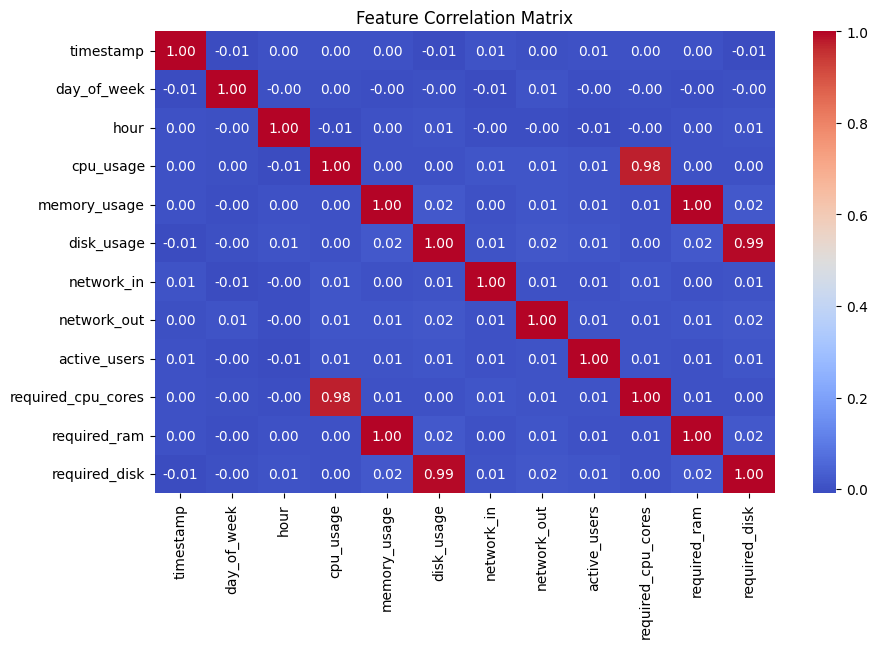

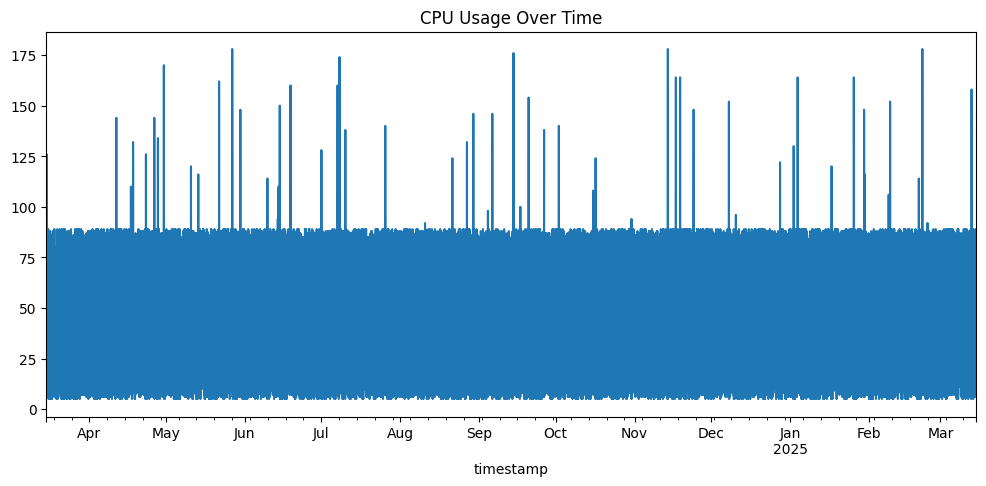

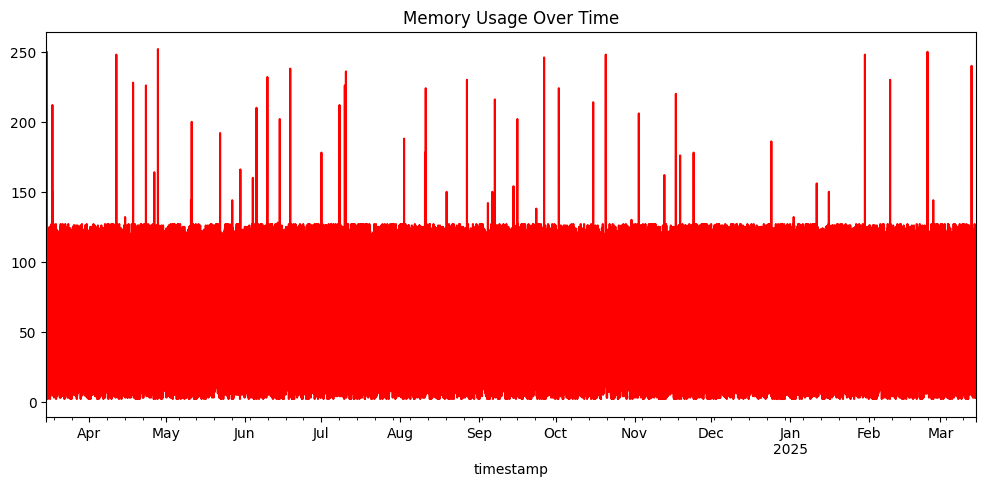

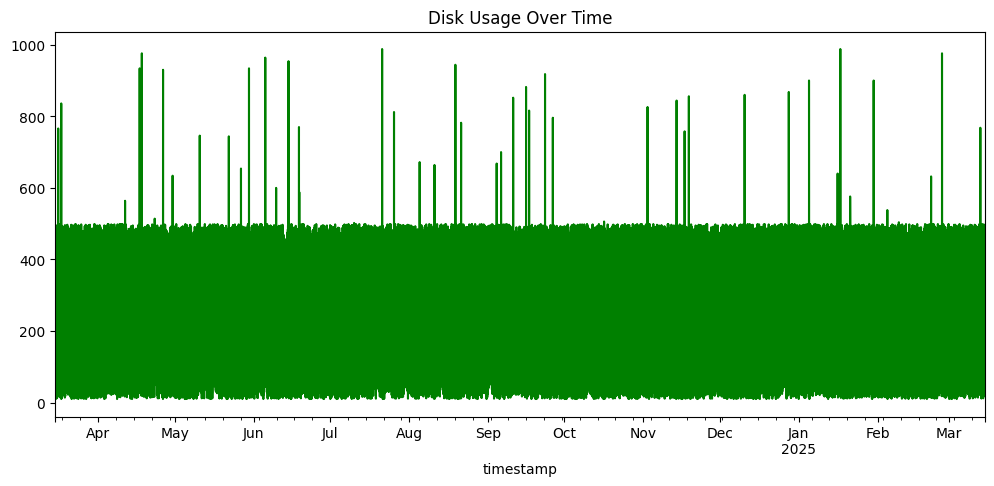

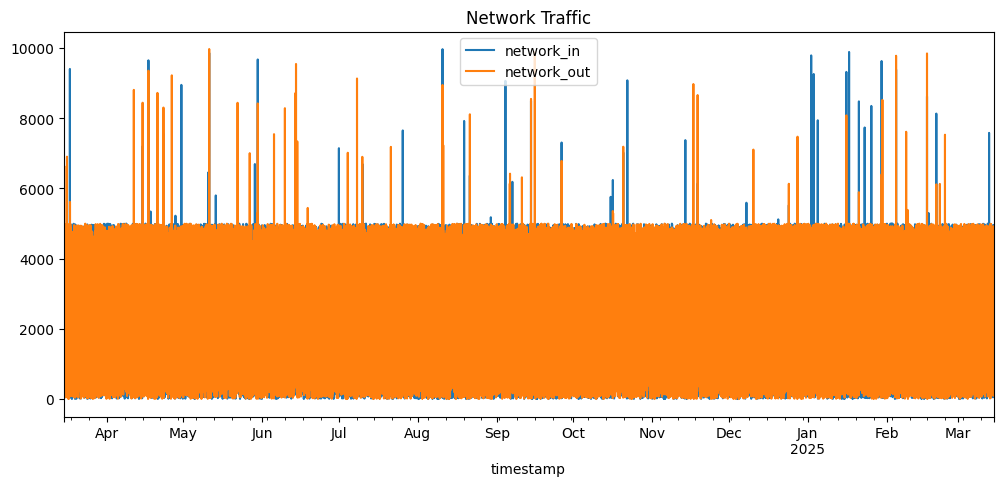

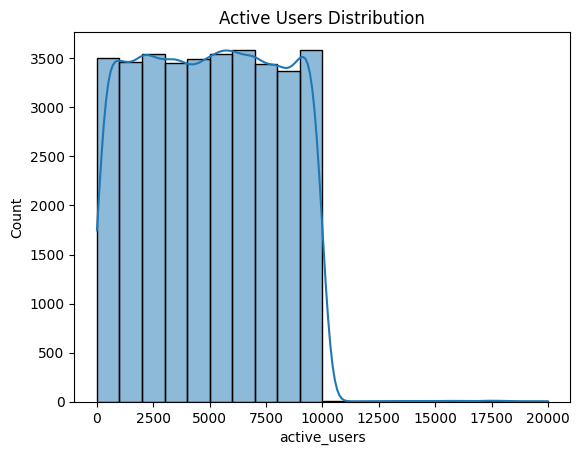

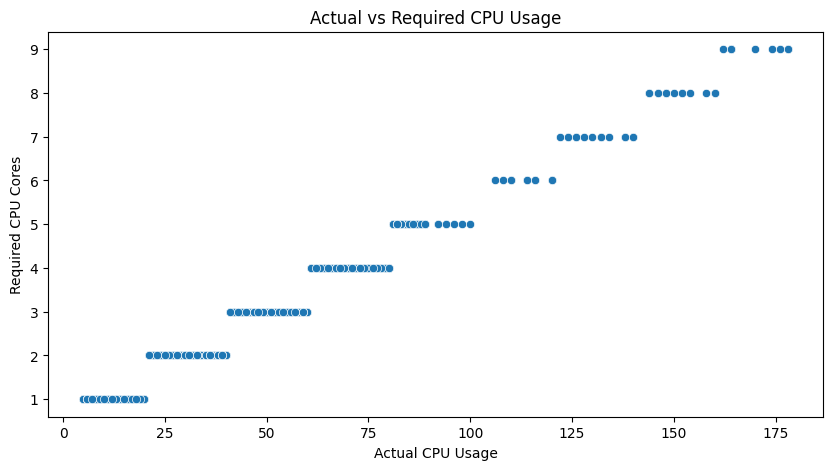

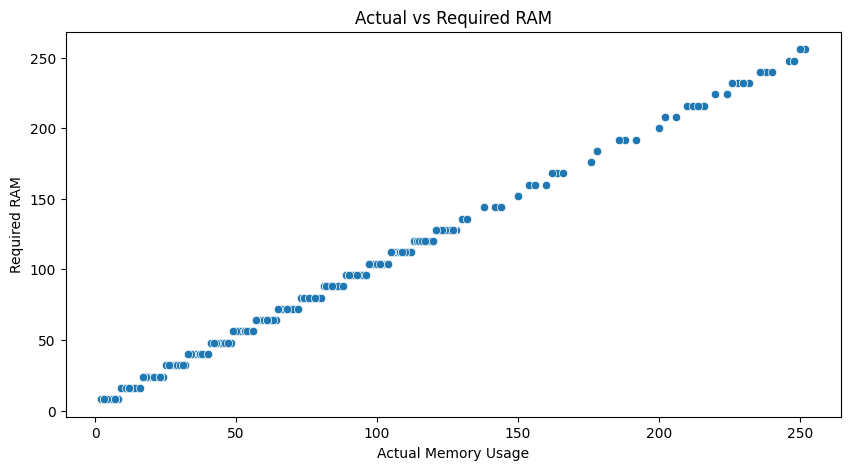

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/autoscaling_usage_patterns.csv')

# Convert timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Summary statistics
print("Basic Statistics:\n", data.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# CPU Usage trend
data.set_index('timestamp')['cpu_usage'].plot(figsize=(12, 5), title='CPU Usage Over Time')
plt.show()

# Memory Usage trend
data.set_index('timestamp')['memory_usage'].plot(figsize=(12, 5), title='Memory Usage Over Time', color='red')
plt.show()

# Disk Usage trend
data.set_index('timestamp')['disk_usage'].plot(figsize=(12, 5), title='Disk Usage Over Time', color='green')
plt.show()

# Network Traffic Analysis
data.set_index('timestamp')[['network_in', 'network_out']].plot(figsize=(12, 5), title='Network Traffic')
plt.show()

# Active users distribution
sns.histplot(data['active_users'], bins=20, kde=True)
plt.title("Active Users Distribution")
plt.show()

# Comparing required vs actual CPU usage
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['cpu_usage'], y=data['required_cpu_cores'])
plt.xlabel("Actual CPU Usage")
plt.ylabel("Required CPU Cores")
plt.title("Actual vs Required CPU Usage")
plt.show()

# Comparing required vs actual RAM usage
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['memory_usage'], y=data['required_ram'])
plt.xlabel("Actual Memory Usage")
plt.ylabel("Required RAM")
plt.title("Actual vs Required RAM")
plt.show()


timestamp             0
day_of_week           0
hour                  0
cpu_usage             0
memory_usage          0
disk_usage            0
network_in            0
network_out           0
active_users          0
required_cpu_cores    0
required_ram          0
required_disk         0
month                 0
weekend               0
dtype: int64


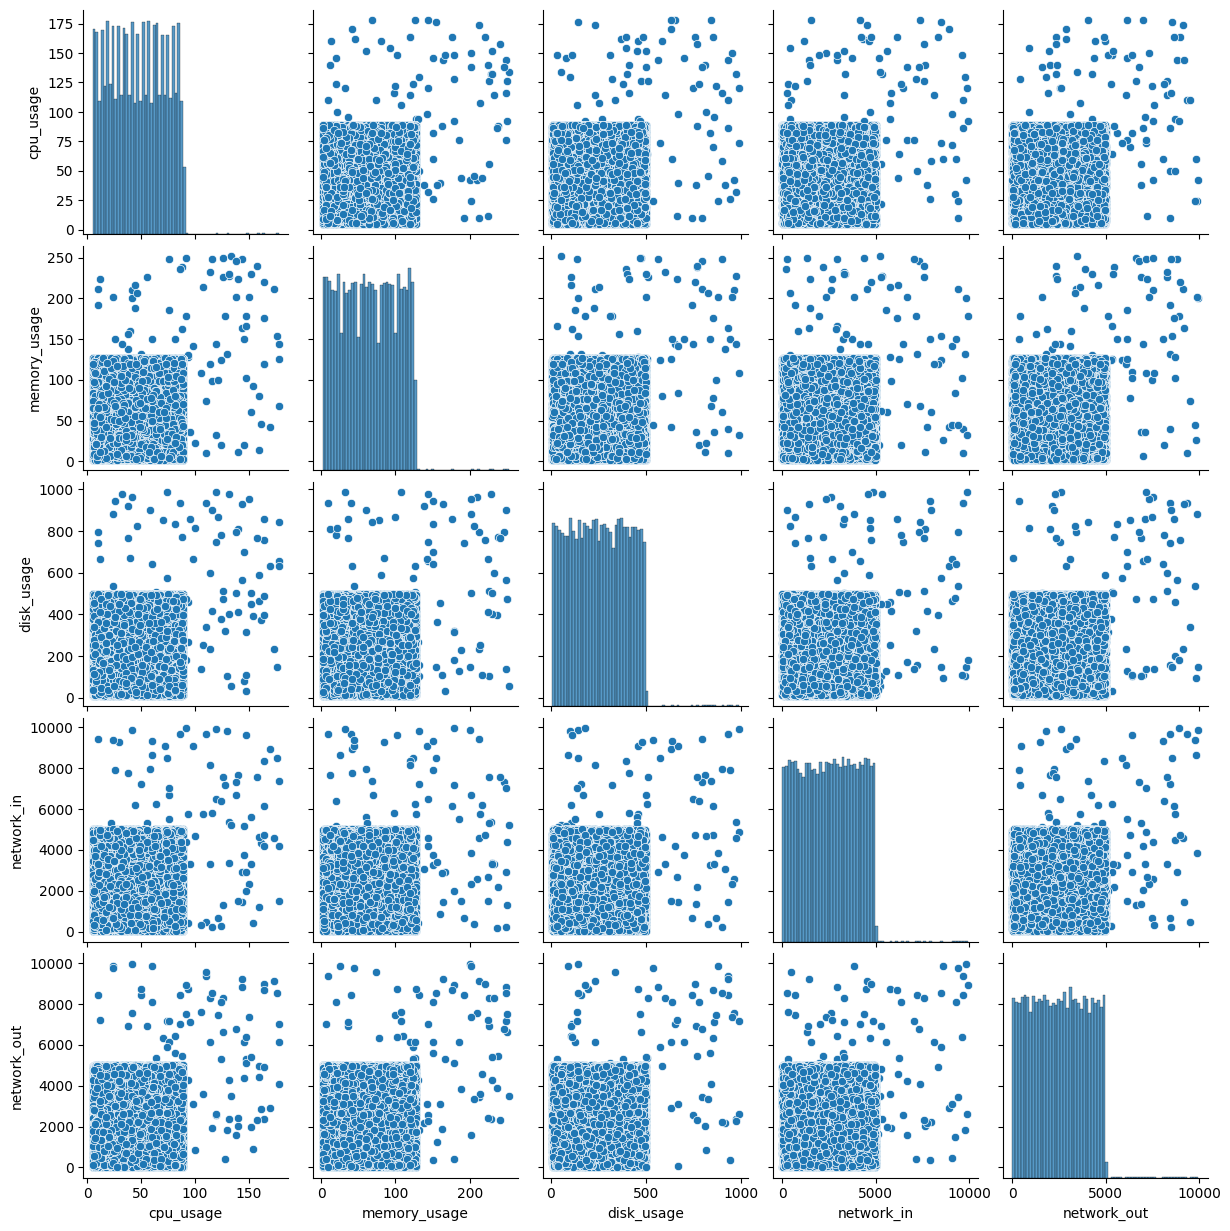

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/autoscaling_usage_patterns.csv", parse_dates=["timestamp"])

# Convert timestamp to datetime & extract useful features
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["month"] = df["timestamp"].dt.month
df["weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Check for missing values
print(df.isnull().sum())

# Visualize data
sns.pairplot(df[["cpu_usage", "memory_usage", "disk_usage", "network_in", "network_out"]])
plt.show()


In [5]:
# Create lag features (previous resource usage)
df["cpu_usage_lag1"] = df["cpu_usage"].shift(1)
df["memory_usage_lag1"] = df["memory_usage"].shift(1)
df["disk_usage_lag1"] = df["disk_usage"].shift(1)

# Rolling averages for trend analysis
df["cpu_rolling_mean"] = df["cpu_usage"].rolling(window=5).mean()
df["memory_rolling_mean"] = df["memory_usage"].rolling(window=5).mean()

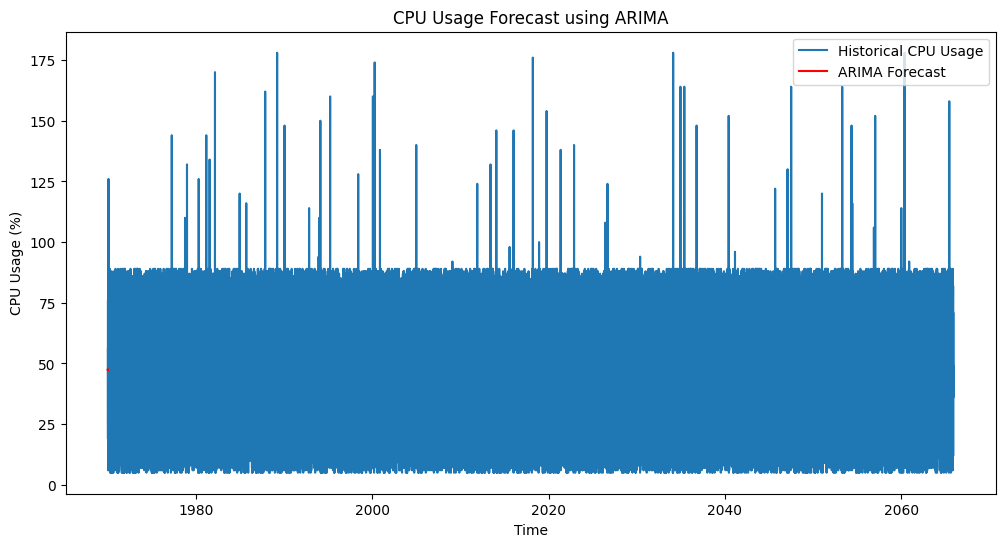

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Define ARIMA model (p=5, d=1, q=2 - adjust as needed)
model_arima = ARIMA(df["cpu_usage"], order=(5, 1, 2))
model_fit = model_arima.fit()

# Forecast next 24 hours



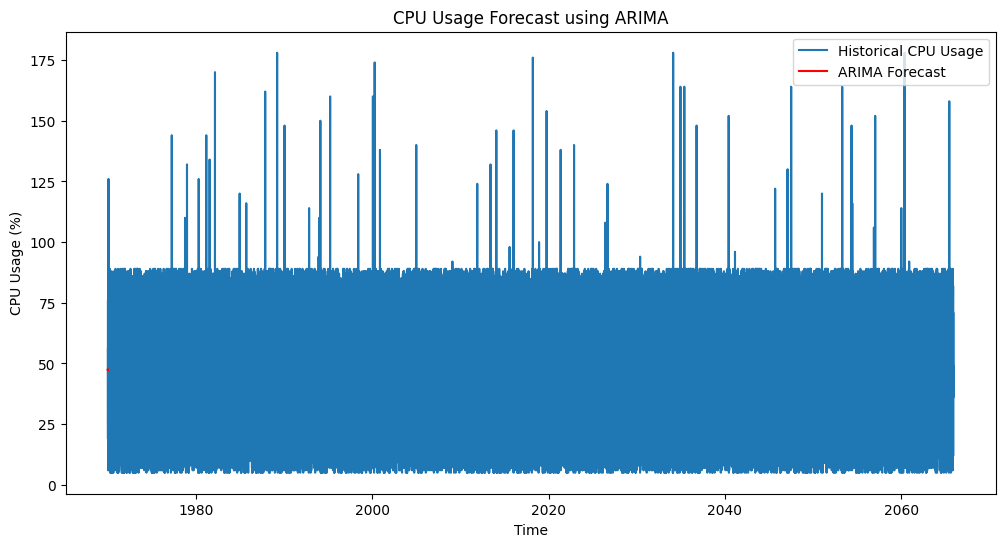

In [8]:
forecast_arima = model_fit.forecast(steps=24)

# Plot ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["cpu_usage"], label="Historical CPU Usage")
plt.plot(pd.date_range(df.index[-1], periods=24, freq="H"), forecast_arima, label="ARIMA Forecast", color="red")
plt.xlabel("Time")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Forecast using ARIMA")
plt.legend()
plt.show()

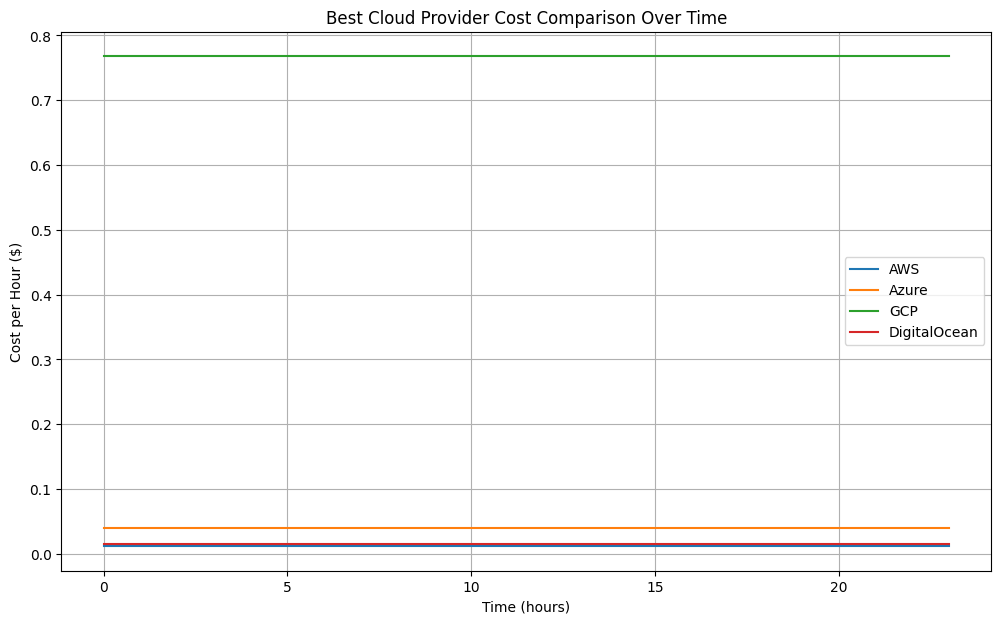

,Cloud_Provider,Instance_Type,CPU_Cores,Memory_GB,Disk_GB,Network_BW_Gbps,Cost_Per_Hour,Hour,Total_Estimated_Cost
0,AWS,t3.micro,2,1,30,5,0.0116,0,0.2784
300,Azure,B2s,2,4,32,8,0.0400,0,0.9600
800,GCP,c2-standard-16,16,64,500,100,0.7680,0,18.4320
900,DigitalOcean,Basic-2GB,1,2,50,3,0.0150,0,0.3600
0,AWS,t3.micro,2,1,30,5,0.0116,1,0.2784
...,...,...,...,...,...,...,...,...,...
900,DigitalOcean,Basic-2GB,1,2,50,3,0.0150,22,0.3600
0,AWS,t3.micro,2,1,30,5,0.0116,23,0.2784
300,Azure,B2s,2,4,32,8,0.0400,23,0.9600
800,GCP,c2-standard-16,16,64,500,100,0.7680,23,18.4320


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load datasets
historical_data_path = "/content/autoscaling_usage_patterns.csv"
cloud_specs_path = "/content/cloud_provider_specs.csv"

df_hist = pd.read_csv(historical_data_path)
df_cloud = pd.read_csv(cloud_specs_path)

# Preprocessing historical data
df_hist["timestamp"] = pd.to_datetime(df_hist["timestamp"])
df_hist.set_index("timestamp", inplace=True)

# Train ARIMA models for CPU & RAM
cpu_model = ARIMA(df_hist["required_cpu_cores"], order=(5,1,0))
cpu_model_fit = cpu_model.fit()

ram_model = ARIMA(df_hist["required_ram"], order=(5,1,0))
ram_model_fit = ram_model.fit()

# Future predictions (next 24 hours)
cpu_pred = cpu_model_fit.forecast(steps=24)
ram_pred = ram_model_fit.forecast(steps=24)

# Store selected instances for each hour
selected_instances = []

for hour, (cpu, ram) in enumerate(zip(cpu_pred, ram_pred)):
    best_instances = []

    for provider in df_cloud["Cloud_Provider"].unique():
        suitable_instances = df_cloud[
            (df_cloud["Cloud_Provider"] == provider) &
            (df_cloud["CPU_Cores"] >= cpu) &
            (df_cloud["Memory_GB"] >= ram)
        ]

        if not suitable_instances.empty:
            best_instance = suitable_instances.nsmallest(1, "Cost_Per_Hour")
        else:
            best_instance = df_cloud[df_cloud["Cloud_Provider"] == provider].nsmallest(1, "Cost_Per_Hour")

        best_instance["Hour"] = hour
        best_instances.append(best_instance)

    selected_instances.append(pd.concat(best_instances))

# Combine selected instances into a DataFrame
df_results = pd.concat(selected_instances)
df_results["Total_Estimated_Cost"] = df_results["Cost_Per_Hour"] * 24

# **Fixed Graph Code**
plt.figure(figsize=(12, 7))

for provider in df_results["Cloud_Provider"].unique():
    subset = df_results[df_results["Cloud_Provider"] == provider]

    if len(subset) < 24:
        cost_series = np.full(24, subset["Cost_Per_Hour"].values[0])  # Use repeated values
    else:
        cost_series = subset["Cost_Per_Hour"].values[:24]

    plt.plot(range(24), cost_series, label=provider)

plt.xlabel("Time (hours)")
plt.ylabel("Cost per Hour ($)")
plt.title("Best Cloud Provider Cost Comparison Over Time")
plt.legend()
plt.grid(True)
plt.show()

df_results


In [16]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)

In [31]:
import pickle

# Save the CPU model
with open("cpu_model.pkl", "wb") as cpu_file:
    pickle.dump(cpu_model_fit, cpu_file)

# Save the RAM model
with open("ram_model.pkl", "wb") as ram_file:
    pickle.dump(ram_model_fit, ram_file)


In [34]:
import boto3
from datetime import datetime, timedelta

cloudwatch = boto3.client("cloudwatch", region_name="us-east-1")
ec2 = boto3.client("ec2", region_name="us-east-1")

def get_metric(instance_id, metric_name, namespace="AWS/EC2"):
    response = cloudwatch.get_metric_statistics(
        Namespace=namespace,
        MetricName=metric_name,
        Dimensions=[{"Name": "InstanceId", "Value": instance_id}],
        StartTime=datetime.utcnow() - timedelta(minutes=10),
        EndTime=datetime.utcnow(),
        Period=300,
        Statistics=["Average"]
    )
    return response["Datapoints"][-1]["Average"] if response["Datapoints"] else None

def get_instance_details(instance_id):
    response = ec2.describe_instances(InstanceIds=[instance_id])
    instance = response["Reservations"][0]["Instances"][0]
    instance_type = instance["InstanceType"]
    return instance_type

# Replace with your instance ID
instance_id = "i-0fe03027365164d17"

# Fetch metrics
cpu_util = get_metric(instance_id, "CPUUtilization")
ram_util = get_metric(instance_id, "MemoryUtilization", namespace="CWAgent")  # CloudWatch Agent needed
disk_read = get_metric(instance_id, "DiskReadBytes", namespace="CWAgent")
disk_write = get_metric(instance_id, "DiskWriteBytes", namespace="CWAgent")
network_in = get_metric(instance_id, "NetworkIn")
network_out = get_metric(instance_id, "NetworkOut")
instance_type = get_instance_details(instance_id)

print(f"🔹 Instance Type: {instance_type}")
print(f"🔹 CPU Usage: {cpu_util}%")
print(f"🔹 RAM Usage: {ram_util}%")
print(f"🔹 Disk Read: {disk_read} bytes")
print(f"🔹 Disk Write: {disk_write} bytes")
print(f"🔹 Network In: {network_in} bytes")
print(f"🔹 Network Out: {network_out} bytes")


NoCredentialsError: Unable to locate credentials

In [35]:
!sudo apt install awscli

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  docutils-common fonts-droid-fallback fonts-noto-mono fonts-urw-base35
  ghostscript groff gsfonts imagemagick imagemagick-6-common imagemagick-6.q16
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common
  libidn12 libijs-0.35 libimagequant0 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libnetpbm10 libraqm0 libwmflite-0.2-7 netpbm
  poppler-data psutils python3-botocore python3-certifi python3-chardet
  python3-colorama python3-dateutil python3-docutils python3-idna
  python3-jmespath python3-olefile python3-pil python3-pyasn1 python3-pygments
  python3-requests python3-roman python3-rsa python3-s3transfer
  python3-urllib3 python3-yaml sgml-base xml-core
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  gh

In [36]:
!aws configure

AWS Access Key ID [None]: 
^C


In [37]:
!pip install paramiko pandas statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 27.6 MB/s eta 0:00:00


In [43]:
import paramiko
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# EC2 Connection Details
EC2_HOST = "34.201.33.253"
EC2_USER = "ubuntu"  # Change for different AMI
EC2_KEY_PATH = "/content/jj.pem"

# Commands to fetch system metrics from EC2
COMMANDS = {
    "cpu": "top -bn1 | grep 'Cpu(s)' | awk '{print $2 + $4}'",  # CPU Usage
    "ram": "free -m | awk 'NR==2{printf \"%.2f\", $3*100/$2 }'",  # RAM Usage %
    "disk": "df -h / | awk 'NR==2{print $5}' | tr -d '%'",  # Disk Usage %
    "network": "cat /proc/net/dev | awk 'NR==3{print $2}'"  # Network Sent Bytes
}

# Function to fetch metrics remotely
def fetch_metrics():
    client = paramiko.SSHClient()
    client.set_missing_host_key_policy(paramiko.AutoAddPolicy())

    try:
        client.connect(EC2_HOST, username=EC2_USER, key_filename=EC2_KEY_PATH)

        metrics = {}
        for metric, command in COMMANDS.items():
            stdin, stdout, stderr = client.exec_command(command)
            output = stdout.read().decode().strip()
            metrics[metric] = float(output) if output else None

        return metrics
    except Exception as e:
        print(f"Error: {e}")
        return None
    finally:
        client.close()

# Fetch metrics from EC2
metrics = fetch_metrics()
if metrics:
    print("Fetched Metrics:", metrics)
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load historical data
historical_data_path = "/content/autoscaling_usage_patterns.csv"
df_hist = pd.read_csv(historical_data_path)

# Convert timestamp column
df_hist["timestamp"] = pd.to_datetime(df_hist["timestamp"])
df_hist.set_index("timestamp", inplace=True)

# Train ARIMA models for CPU & RAM usage
cpu_model = ARIMA(df_hist["required_cpu_cores"], order=(5,1,0)).fit()
ram_model = ARIMA(df_hist["required_ram"], order=(5,1,0)).fit()

# Predict for next 24 hours
cpu_pred = cpu_model.forecast(steps=24)
ram_pred = ram_model.forecast(steps=24)

# Compare with current EC2 metrics
print(f"Real-Time CPU Usage: {metrics['cpu']}%")
print(f"Real-Time RAM Usage: {metrics['ram']}%")

# Decision Logic for Scaling
scale_up_cpu = metrics["cpu"] > 80 or (cpu_pred.mean() > 80)
scale_up_ram = metrics["ram"] > 80 or (ram_pred.mean() > 80)

if scale_up_cpu or scale_up_ram:
    print("🔺 Recommendation: Scale UP your instance!")
else:
    print("✅ Your instance is running efficiently.")



Fetched Metrics: {'cpu': 91.7, 'ram': 35.53, 'disk': 32.0, 'network': 17460.0}
Real-Time CPU Usage: 91.7%
Real-Time RAM Usage: 35.53%
🔺 Recommendation: Scale UP your instance!


In [45]:
import paramiko
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# EC2 instance details
HOST = "34.201.33.253"
USER = "ubuntu"  # or 'ec2-user' for Amazon Linux
SSH_KEY_PATH = "/content/jj.pem"

# Command to fetch system metrics remotely
CMD = """\
    echo "CPU: $(top -bn1 | grep 'Cpu(s)' | awk '{print $2 + $4}')"; \
    echo "RAM: $(free -m | awk '/Mem:/ {print $3}')"; \
    echo "Disk I/O: $(iostat -d | awk 'NR==4 {print $2}')"
"""

# Connect to EC2 instance via SSH
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(HOST, username=USER, key_filename=SSH_KEY_PATH)

# Execute command & get output
stdin, stdout, stderr = ssh.exec_command(CMD)
output = stdout.read().decode().split("\n")
ssh.close()

# Parse the fetched metrics
cpu_util = float(output[0].split(":")[1].strip())
ram_util = float(output[1].split(":")[1].strip())
disk_io = float(output[2].split(":")[1].strip())

# Store metrics in a DataFrame
df_real_time = pd.DataFrame({
    "timestamp": pd.Timestamp.now(),
    "required_cpu_cores": [cpu_util],
    "required_ram": [ram_util]
})

print(df_real_time)
# Load previous model (if saved)
import pickle

# Load ARIMA models (previously trained)
with open("cpu_model.pkl", "rb") as f:
    cpu_model_fit = pickle.load(f)

with open("ram_model.pkl", "rb") as f:
    ram_model_fit = pickle.load(f)

# Predict next 24 hours usage
cpu_pred = cpu_model_fit.forecast(steps=24)
ram_pred = ram_model_fit.forecast(steps=24)

# Load cloud provider specs
cloud_specs_path = "/content/cloud_provider_specs.csv"
df_cloud = pd.read_csv(cloud_specs_path)

# Find best instances
best_providers = {}
for cpu, ram in zip(cpu_pred, ram_pred):
    for provider in df_cloud["Cloud_Provider"].unique():
        provider_instances = df_cloud[df_cloud["Cloud_Provider"] == provider]
        suitable_instances = provider_instances[
            (provider_instances["CPU_Cores"] >= cpu) &
            (provider_instances["Memory_GB"] >= ram)
        ]
        best_instance = suitable_instances.nsmallest(1, "Cost_Per_Hour") if not suitable_instances.empty else provider_instances.nsmallest(1, "Cost_Per_Hour")
        best_providers[provider] = best_instance

df_results = pd.concat(best_providers.values())
df_results["Total_Estimated_Cost"] = df_results["Cost_Per_Hour"] * 24

print(df_results)
threshold_cpu = df_results["CPU_Cores"].min() * 0.8  # 80% of min instance
threshold_ram = df_results["Memory_GB"].min() * 0.8

if cpu_util > threshold_cpu or ram_util > threshold_ram:
    print("⚠️ Scaling required! Consider upgrading instance.")
else:
    print("✅ No scaling required. Instance is sufficient.")



                   timestamp  required_cpu_cores  required_ram
0 2025-03-15 09:21:00.138160                 0.0         339.0
    Cloud_Provider   Instance_Type  CPU_Cores  Memory_GB  Disk_GB  \
0              AWS        t3.micro          2          1       30   
300          Azure             B2s          2          4       32   
800            GCP  c2-standard-16         16         64      500   
900   DigitalOcean       Basic-2GB          1          2       50   

     Network_BW_Gbps  Cost_Per_Hour  Total_Estimated_Cost  
0                  5         0.0116                0.2784  
300                8         0.0400                0.9600  
800              100         0.7680               18.4320  
900                3         0.0150                0.3600  
⚠️ Scaling required! Consider upgrading instance.


In [33]:
!pip install boto3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.9 MB/s eta 0:00:00
